In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from math import *
import pickle

In [2]:
data = np.loadtxt('data/train.txt', dtype=int, delimiter=',',skiprows=1)

In [3]:
timestamps = data[:,0]
data = data[:,1:]
orig_data = np.copy(data)

In [4]:
data[data == -1] = 0

In [5]:
sum_tot = np.sum(data,axis=1)

In [6]:
sum_tot

array([2, 2, 0, ..., 2, 0, 1])

In [7]:
sum_tot = np.reshape(sum_tot,(-1,30))

In [8]:
sum_tot.shape

(1440, 30)

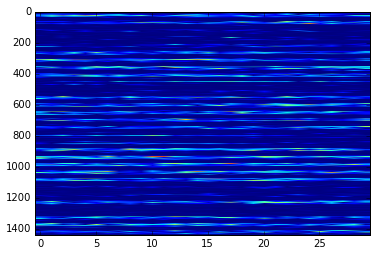

In [9]:
plt.imshow(sum_tot,aspect='auto')

In [10]:
timestamps[timestamps % 10000 == 1553]

array([ 11553,  21553,  31553,  41553,  51553,  61553,  71553,  81553,
        91553, 101553, 111553, 121553, 131553, 141553, 151553, 161553,
       171553, 181553, 191553, 201553, 211553, 221553, 231553, 241553,
       251553, 261553, 271553, 281553, 291553, 301553])

In [11]:
S1_0245 = data[timestamps % 10000==245,0]

In [12]:
S1_0245

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [13]:
S1_635 = data[timestamps%10000==635,0]

In [14]:
S1_635

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [4]:
x, y = np.genfromtxt('data/sensor-coordinates.txt',delimiter=',',skip_header=1,usecols=(1,2),unpack=True)

In [5]:
x, y

(array([ 116.66,  123.75,  102.49,  109.57,   60.44,   88.95,   60.44,
          95.4 ,   74.62,   59.81,   59.81,   81.86,   66.11,   81.07,
          73.36,   73.36,   73.36,   73.36,   73.36,   73.36,   73.36,
          73.36,   80.44,   87.53,   94.61,  101.7 ,  109.57,  109.57,
         109.57,  109.57,  109.57,  109.57,  116.03,  123.75,  119.65,
         133.19,  140.44,  147.52,   73.36,  154.61,  133.19,  133.19,
          73.36,   67.53,   60.44,  133.19,  109.57,  109.57,  109.57,
         109.57,  109.57,  101.7 ,   95.4 ,   88.16,   59.81,   73.36]),
 array([  76.02,   74.6 ,   74.6 ,   74.6 ,   82.38,   74.6 ,   90.17,
          74.6 ,   74.6 ,  105.74,  113.52,   74.6 ,  113.52,  183.57,
         190.65,  182.86,  175.08,  159.51,  151.73,  143.95,  136.16,
         128.38,  136.16,  136.16,  136.16,  136.16,  136.16,  143.95,
         128.38,  120.59,  112.81,  105.03,   97.95,   90.17,   83.09,
          81.32,   81.32,   81.32,  113.52,   81.32,   73.54,   65.76,
    

/Users/ta24418/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


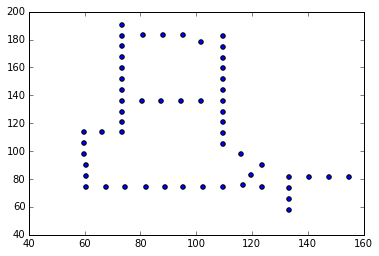

In [7]:
plt.scatter(x,y,c=data[0,1:],cmap=plt.cm.)
plt.show()